# McDonald's Low Performing Stores Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [43]:
df = pd.read_csv("yelp_business.csv")
df1 = pd.read_csv("yelp_business_attributes.csv")
mac = df[df.name.isin(['\"McDonald\'s\"','\"McDonalds\"'])]
mac_final = pd.merge(mac,df1,on = 'business_id')

In [46]:
mac_final.shape

(722, 94)

In [48]:
mac_final.head(2)

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,AcceptsInsurance,ByAppointmentOnly,BusinessAcceptsCreditCards,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,HairSpecializesIn_coloring,HairSpecializesIn_africanamerican,HairSpecializesIn_curly,HairSpecializesIn_perms,HairSpecializesIn_kids,HairSpecializesIn_extensions,HairSpecializesIn_asian,HairSpecializesIn_straightperms,RestaurantsPriceRange2,GoodForKids,WheelchairAccessible,BikeParking,Alcohol,HasTV,NoiseLevel,RestaurantsAttire,Music_dj,Music_background_music,Music_no_music,...,Caters,WiFi,RestaurantsReservations,RestaurantsTakeOut,HappyHour,GoodForDancing,RestaurantsTableService,OutdoorSeating,RestaurantsDelivery,BestNights_monday,BestNights_tuesday,BestNights_friday,BestNights_wednesday,BestNights_thursday,BestNights_sunday,BestNights_saturday,GoodForMeal_dessert,GoodForMeal_latenight,GoodForMeal_lunch,GoodForMeal_dinner,GoodForMeal_breakfast,GoodForMeal_brunch,CoatCheck,Smoking,DriveThru,DogsAllowed,BusinessAcceptsBitcoin,Open24Hours,BYOBCorkage,BYOB,Corkage,DietaryRestrictions_dairy-free,DietaryRestrictions_gluten-free,DietaryRestrictions_vegan,DietaryRestrictions_kosher,DietaryRestrictions_halal,DietaryRestrictions_soy-free,DietaryRestrictions_vegetarian,AgesAllowed,RestaurantsCounterService
0,rDMptJYWtnMhpQu_rRXHng,"""McDonald's""",NaN,"""719 E Thunderbird Rd""",Phoenix,AZ,85022,33.607070,-112.064382,1.0,10,1,Fast Food;Burgers;Restaurants,Na,Na,Na,Na,False,False,False,True,False,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,True,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
1,iPa__LOhse-hobC2Xmp-Kw,"""McDonald's""",NaN,"""1635 E Camelback Rd""",Phoenix,AZ,85016,33.508765,-112.046240,3.0,34,1,Restaurants;Burgers;Fast Food,Na,Na,Na,Na,False,False,False,True,False,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,True,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na


In [49]:
mac_final['stars'].describe()

count    722.000000
mean       2.149584
std        0.701044
min        1.000000
25%        1.500000
50%        2.000000
75%        2.500000
max        5.000000
Name: stars, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fab7110a910>,
 'caps': [<matplotlib.lines.Line2D at 0x7fab68ca33d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fab7110aa10>],
 'medians': [<matplotlib.lines.Line2D at 0x7fab73cc3a50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fab73cc3d90>],
 'means': []}

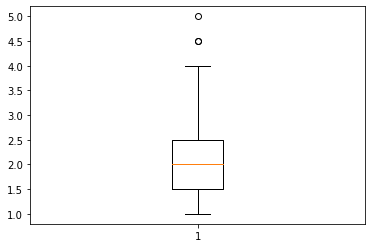

In [50]:
plt.boxplot(mac_final['stars'])

So all the McDonald's in the lower 25% percentile are not permforming well compared to the other stores and need to be investigated for further analysis. Also, from the box plot we see that we have a few outliers that have very good rating i.e > 4.0 stars 

In [51]:
outlier_stores = mac_final[(mac_final['stars'] > 4.0)]
outlier_stores

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,AcceptsInsurance,ByAppointmentOnly,BusinessAcceptsCreditCards,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,HairSpecializesIn_coloring,HairSpecializesIn_africanamerican,HairSpecializesIn_curly,HairSpecializesIn_perms,HairSpecializesIn_kids,HairSpecializesIn_extensions,HairSpecializesIn_asian,HairSpecializesIn_straightperms,RestaurantsPriceRange2,GoodForKids,WheelchairAccessible,BikeParking,Alcohol,HasTV,NoiseLevel,RestaurantsAttire,Music_dj,Music_background_music,Music_no_music,...,Caters,WiFi,RestaurantsReservations,RestaurantsTakeOut,HappyHour,GoodForDancing,RestaurantsTableService,OutdoorSeating,RestaurantsDelivery,BestNights_monday,BestNights_tuesday,BestNights_friday,BestNights_wednesday,BestNights_thursday,BestNights_sunday,BestNights_saturday,GoodForMeal_dessert,GoodForMeal_latenight,GoodForMeal_lunch,GoodForMeal_dinner,GoodForMeal_breakfast,GoodForMeal_brunch,CoatCheck,Smoking,DriveThru,DogsAllowed,BusinessAcceptsBitcoin,Open24Hours,BYOBCorkage,BYOB,Corkage,DietaryRestrictions_dairy-free,DietaryRestrictions_gluten-free,DietaryRestrictions_vegan,DietaryRestrictions_kosher,DietaryRestrictions_halal,DietaryRestrictions_soy-free,DietaryRestrictions_vegetarian,AgesAllowed,RestaurantsCounterService
35,Zd4ZznYCrMCdEGVzytb-4g,"""McDonald's""",Financial District,"""100 King Street W""",Toronto,ON,M5X 2A1,43.648636,-79.381744,5.0,6,1,Fast Food;Burgers;Restaurants,Na,Na,Na,Na,False,False,False,False,False,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,False,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
122,XHcuFkQaZltjjZmHRR9b-w,"""McDonald's""",Third Ward,"""Overstreet Mall""",Charlotte,NC,28202,35.232678,-80.846082,4.5,6,1,Hot Dogs;Restaurants;Burgers;Fast Food,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,True,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
651,FWRtx_h3plgIq-9pucg_9w,"""McDonald's""",Scarborough,"""7431 Kingston Road""",Scarborough,ON,M1B 5S3,43.800274,-79.143341,4.5,5,1,Burgers;Restaurants;Fast Food,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,True,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na


In [52]:
poor_stores_open = mac_final[(mac_final['stars'] <= 1.5) & (mac_final['is_open']==1)]

poor_stores_died = mac_final[(mac_final['stars'] <= 1.5) & (mac_final['is_open']==0)]

In [53]:
poor_stores_open.shape

(216, 94)

In [54]:
poor_stores_died

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,AcceptsInsurance,ByAppointmentOnly,BusinessAcceptsCreditCards,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,HairSpecializesIn_coloring,HairSpecializesIn_africanamerican,HairSpecializesIn_curly,HairSpecializesIn_perms,HairSpecializesIn_kids,HairSpecializesIn_extensions,HairSpecializesIn_asian,HairSpecializesIn_straightperms,RestaurantsPriceRange2,GoodForKids,WheelchairAccessible,BikeParking,Alcohol,HasTV,NoiseLevel,RestaurantsAttire,Music_dj,Music_background_music,Music_no_music,...,Caters,WiFi,RestaurantsReservations,RestaurantsTakeOut,HappyHour,GoodForDancing,RestaurantsTableService,OutdoorSeating,RestaurantsDelivery,BestNights_monday,BestNights_tuesday,BestNights_friday,BestNights_wednesday,BestNights_thursday,BestNights_sunday,BestNights_saturday,GoodForMeal_dessert,GoodForMeal_latenight,GoodForMeal_lunch,GoodForMeal_dinner,GoodForMeal_breakfast,GoodForMeal_brunch,CoatCheck,Smoking,DriveThru,DogsAllowed,BusinessAcceptsBitcoin,Open24Hours,BYOBCorkage,BYOB,Corkage,DietaryRestrictions_dairy-free,DietaryRestrictions_gluten-free,DietaryRestrictions_vegan,DietaryRestrictions_kosher,DietaryRestrictions_halal,DietaryRestrictions_soy-free,DietaryRestrictions_vegetarian,AgesAllowed,RestaurantsCounterService
73,UY1BHeeb1oE0-uk0EKqaGg,"""McDonald's""",NaN,"""10823 S 51st St""",Ahwatukee,AZ,85044,33.348551,-111.975151,1.5,7,0,Fast Food;Food;Restaurants;Burgers,Na,Na,Na,Na,False,False,False,False,False,Na,Na,Na,Na,Na,Na,Na,Na,Na,True,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
88,NHersw9tR7dnmlZINOBi9Q,"""McDonald's""",Tower City,"""230 W Huron Rd""",Cleveland,OH,44113,41.496905,-81.693618,1.0,6,0,Burgers;Restaurants;Fast Food,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,False,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
115,FKcj1DmDWsRO4aOQ6i_nWw,"""McDonalds""",North Collinwood,"""15901 Lake Shore Blvd""",Cleveland,OH,44110,41.579856,-81.570297,1.0,4,0,Restaurants;Burgers;Sandwiches;Fast Food,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,False,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
271,bHGxQS3wfX93sMFOuR6xDw,"""McDonald's""",NaN,"""3229 Losee Rd""",North Las Vegas,NV,89030,36.219109,-115.126973,1.5,15,0,Burgers;Fast Food;Restaurants,Na,Na,Na,Na,False,False,False,False,False,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,True,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
398,JcWzvvDWh4RY04tvm1LQzA,"""McDonald's""",Eastside,"""2640 E Tropicana Ave""",Las Vegas,NV,89121,36.100279,-115.114010,1.5,12,0,Fast Food;Restaurants;Burgers,Na,Na,Na,Na,False,False,False,False,False,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,True,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
454,PnUIxpOR7eEY6NYOYQdY9g,"""McDonald's""",NaN,"""4550 E Cactus Rd""",Phoenix,AZ,85032,33.602747,-111.983350,1.5,4,0,Burgers;Restaurants;Fast Food,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,True,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
579,1uAZaTHYn9rqTFtOl3sDEQ,"""McDonald's""",NaN,"""33560 Aurora Rd""",Solon,OH,44139,41.384594,-81.440085,1.5,6,0,Fast Food;Restaurants;Burgers,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,False,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na


So we have about 235 such open McDonalds store that aren't performing well and have review stars below 1.50. A good analysis would also be to see why the stores closed down?

Text(0, 0.5, 'Review Stars')

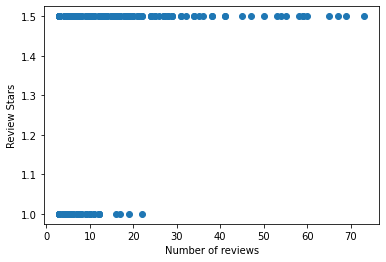

In [55]:
plt.scatter(poor_stores_open['review_count'] , poor_stores_open['stars'])
plt.xlabel('Number of reviews')
plt.ylabel('Review Stars')

There are some stores that do not have many reviews yet i.e. <10 reviews and it is difficult to assess the usefulness of the review score for such stores. We can further analyse poor performing stores - where are they located ?

In [56]:
#Trends of the review for a particular store 

reviews = pd.read_csv("yelp_review.csv")

In [57]:
#There is one store that has many reviews but is rated poorly. Let's see what happened 
poor_stores_open[poor_stores_open['review_count']>70]['business_id']

54    ncEJaX_79zZGSS1NQNzu4A
Name: business_id, dtype: object

In [58]:
review_for_store = reviews[reviews['business_id']=="ncEJaX_79zZGSS1NQNzu4A"]

In [80]:
from datetime import datetime
review_for_store['date'] = pd.to_datetime(review_for_store['date'])

/Users/yashica/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [81]:
review_for_store['year'] = review_for_store['date'].dt.year

/Users/yashica/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Average Stars vs Year for Store with Id=ncEJaX_79zZGSS1NQNzu4A ')

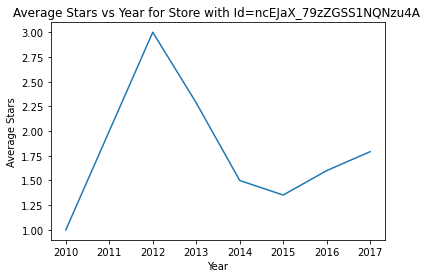

In [89]:
plt.plot(review_for_store[['year', 'stars']].groupby(['year'], as_index=True).mean())
plt.xlabel('Year')
plt.ylabel('Average Stars')
plt.title('Average Stars vs Year for Store with Id=ncEJaX_79zZGSS1NQNzu4A ')

# McDonald's Business Attributes Analysis

In [4]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Import data
df = pd.read_csv("yelp_business.csv")
df1 = pd.read_csv("yelp_business_attributes.csv")

In [5]:
mac = df[df.name.isin(['\"McDonald\'s\"','\"McDonalds\"'])]
mac_final = pd.merge(mac,df1,on = 'business_id')

In [6]:
#find poor performing mac
low_standard = 1.50
mac1 = mac_final.drop(columns = ['neighborhood','address','postal_code',
              'latitude','longitude','review_count','categories'])

for col in mac1:
    if mac1[col].nunique()==1:
        mac1.drop(columns = col,inplace = True, axis=1)

#add additional column
"""quality = []
for i in mac1.stars:
    if i>1.5:
        quality.append(1)
    else:
        quality.append(0)
mac1['quality'] = quality
"""
#change all true to 1 and all false/Na to 0
for i in list(mac1.columns):
    mac1.loc[mac1[i]=='Na',i] = 0
    mac1.loc[mac1[i]=='False',i] = 0
    mac1.loc[mac1[i]=='none',i] = 0
    mac1.loc[mac1[i]=='casual',i] = 1
    mac1.loc[mac1[i]=='free',i] = 1
    mac1.loc[mac1[i]=='True',i] = 1

In [7]:
#build models to see
X = mac1.iloc[:,6:-1]
y = mac1.iloc[:,4]

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

#model building (random forest)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=5)
randomforest = RandomForestRegressor(random_state = 5,max_depth = 2, n_estimators=200)
model = randomforest.fit(X_train,y_train)
y_test_pred = model.predict(X_test)
#print(i,':',accuracy_score(y_test,y_test_pred))

In [8]:
mac1.columns

Index(['business_id', 'name', 'city', 'state', 'stars', 'is_open',
       'BusinessParking_garage', 'BusinessParking_street',
       'BusinessParking_validated', 'BusinessParking_lot',
       'BusinessParking_valet', 'HairSpecializesIn_coloring', 'GoodForKids',
       'WheelchairAccessible', 'BikeParking', 'Alcohol', 'HasTV', 'NoiseLevel',
       'Music_dj', 'Caters', 'WiFi', 'RestaurantsReservations',
       'RestaurantsTakeOut', 'HappyHour', 'OutdoorSeating',
       'BestNights_monday', 'DogsAllowed'],
      dtype='object')

In [9]:
importances = randomforest.feature_importances_
feature_names = [f'{i}' for i in X.columns]
std = np.std([
    tree.feature_importances_ for tree in randomforest.estimators_], axis=0)

In [10]:
forest_importances = pd.Series(importances, index=feature_names).sort_values()

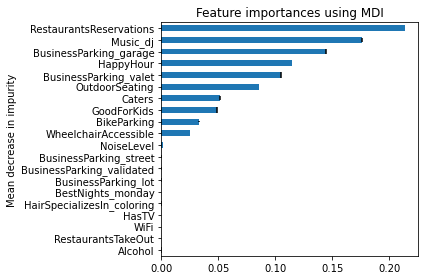

In [11]:
fig, ax = plt.subplots()
forest_importances.plot.barh(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()